# PubFL - Censorship-Resistant Federated Learning on Public Blockchains
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## MNIST Dataset simulation


### Contents
* [Simulation](#Deploy-Challenger-Contract-and-Start-Simulation)
* [Visualization](#Visualize-Simulation)
* [Individual Transactions](#Transactions)
* [Contracts and Participants](#Contracts-and-Paricipants-(Latex-format))
* [Gas Costs](#Table-with-Gas-Info-(Latex-format))

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
#DATASET = "cifar-10"
DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 4
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18)
MINIMUM_ROUNDS = 8
MIN_BUY_IN = int(1e18)
MAX_BUY_IN = int(1.5e18)
STANDARD_BUY_IN = int(1e18)
EPOCHES = 1 #25
BATCH_SIZE = 32 #128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 50% OF MIN DEPOSIT

FORK = False # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]
else:
    PRIVKEYS = None

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET, 
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)


for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Data Loaded:
Nr. of images for training: 60,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS, 
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              FORK,
                                              PRIVKEYS)
manager.buildContract()

Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 12,578,202

Total Contributers:       6
Good Contributers:        4 (67%)
Malicious Contributers:   1 (17%)
Freeriding Contributers:  1 (17%)
Inactive Contributers:    0 (0%)
Learning Rounds:          8
-----------------------------------------------------------------------------------
Account initiated @ Address 0x0fFA839aB1C4DeF4cbf5205... with 7.4  ETH | FAIR USER
Account initiated @ Address 0x0EB7D84A18a8c75304519A5... with 2.0  ETH | FAIR USER
Account initiated @ Address 0xE6876A9468D6874d2cCA9C4... with 2.0  ETH | FAIR USER
Account initiated @ Address 0x0307874e80b7DE924C0A09d... with 2.0  ETH | FAIR USER
Account initiated @ Address 0x640B310e7E7B7fb7c04D1D9... with 2.0  ETH | MAL. USER
Account initiated @ Address 0x692F6cA12A30c160e0D54E4... with 2.0  ETH | FREE USER
-----------------------------------------------------------------------------------

Manager deployed  @ Address 0x53DB49E4786bD2b7FA714a76CD31D727526

### Deploy Challenger Contract and Start Simulation

In [8]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0x1EdDf495E5bC5F89827ab498D717eb2801599883 | 0xb4a9...

-----------------------------------------------------------------------------------
Account registered: 0x0fFA839aB1C4De... | 0xb4a9... | 1,000,000,000,000,000,000 WEI
Account registered: 0x0EB7D84A18a8c7... | 0xfab9... | 1,100,000,000,000,000,000 WEI
Account registered: 0xE6876A9468D687... | 0x58c3... | 1,200,000,000,000,000,000 WEI
Account registered: 0x0307874e80b7DE... | 0xa91f... | 1,300,000,000,000,000,000 WEI
Account registered: 0x640B310e7E7B7f... | 0x2aea... | 1,400,000,000,000,000,000 WEI
Account registered: 0x692F6cA12A30c1... | 0x8b4e... | 1,500,000,000,000,000,000 WEI
-----------------------------------------------------------------------------------
Round 1 starts...
Address 0x692F6cA12A30c1... going to switch attitude to freerider

=========================== FEDERATED LEARNING STAR

### Visualize Simulation 

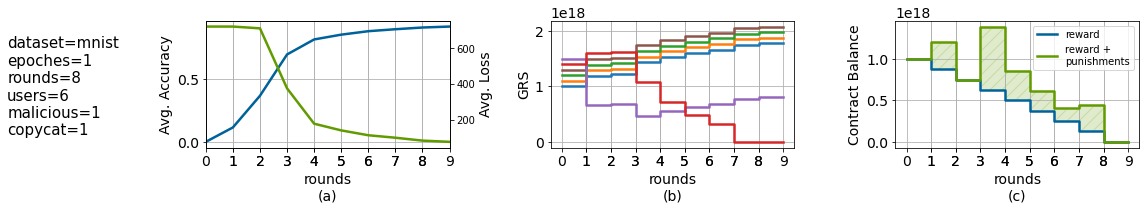

In [9]:
model.visualize_simulation()

### Transactions

In [10]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.waitForTransactionReceipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - 0xfab9c4054f1552967874f1100a976dda385518229764ed940ce3ed5cbe82f0cb -   127,396 -   ✅
register   - 0x58c331a7a9fb3d39a47ee9525d94d53c77c84ec2ecf0eefb67a4041da32e9373 -   127,396 -   ✅
register   - 0xa91f8d864df77896a463f75c83b9b0eb623b571f012909137dcfcf90da71f01f -   127,396 -   ✅
register   - 0x2aeafe8d07655e908b0e1e7df91157d0decd5526744b23c979fc899928705575 -   127,396 -   ✅
register   - 0x8b4e3b111a54ced7a6546c02e436b87bcd6e0114a7b56ad11d5cb6482a2f5e95 -   127,396 -   ✅
slot       - 0x8430b8d76b93661eb064ff27fcb9daf9b4e8396a76c57f93fdcc82e0baa48d86 -    51,185 -   ✅
slot       - 0x335e39d9603e4484245af2d367985dfcf59e895660b69f2fd874633addd7867d -    51,185 -   ✅
slot       - 0x1068cca7f7bd48fa10baf516718cdd1daee2e9dfd654ca6a28241d20a23b4da8 -    51,185 -   ✅
slot       - 0x076dfd45

### Contracts and Paricipants (Latex format)

In [11]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("\\footnotesize{"+"Contract} &"+" \\footnotesize{Address (Ropsten Testnet)} \\\ ")
print("\\hline")
print("\\footnotesize{"+"Ma-1} & \\footnotesize{"+"{}".format(manager.manager.address)+"} \\\ ")
print("\\footnotesize{"+"Ch-1} & \\footnotesize{"+"{}".format(model.model.address)+"} \\\ ")
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("\\footnotesize{"+"P-{}".format(i+1)+"}  & \\footnotesize{"+"{}".format(p.address)+"} \\\ ")

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
\footnotesize{Contract} & \footnotesize{Address (Ropsten Testnet)} \\ 
\hline
\footnotesize{Ma-1} & \footnotesize{0x53DB49E4786bD2b7FA714a76CD31D7275268Dd83} \\ 
\footnotesize{Ch-1} & \footnotesize{0x1EdDf495E5bC5F89827ab498D717eb2801599883} \\ 
\footnotesize{P-1}  & \footnotesize{0x0fFA839aB1C4DeF4cbf5205bCD775831EA15445d} \\ 
\footnotesize{P-2}  & \footnotesize{0x0EB7D84A18a8c75304519A59b372dc74aBd11464} \\ 
\footnotesize{P-3}  & \footnotesize{0xE6876A9468D6874d2cCA9C48807d6Bf1f030bA97} \\ 
\footnotesize{P-4}  & \footnotesize{0x0307874e80b7DE924C0A09df0c4B9447a58469B9} \\ 
\footnotesize{P-5}  & \footnotesize{0x640B310e7E7B7fb7c04D1D9892959c7638d002C3} \\ 
\footnotesize{P-6}  & \footnotesize{0x692F6cA12A30c160e0D54E42743d6af6Ee279957} \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [12]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ c|c|c }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} ETH \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ c|c|c }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,184 & 0.00102 ETH \\ 
provide weights** & 60,492 & 0.00121 ETH \\ 
feedback & 261,819 & 0.00524 ETH \\ 
settle round & 531,351 & 0.01063 ETH \\ 
\hline
\hline
complete round & 1,032,241 & 0.02064 ETH \\ 
\hline
\end{tabular}
